In [1]:
import mercator
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from helper.misc import flatten

In [6]:
data = pd.read_csv('routes.dat', sep=',', header=None).loc[:, [2, 4]]
data.to_csv('route_edges.tsv', sep='\t', index=False)
data

,2,4
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
67658,WYA,ADL
67659,DME,FRU
67660,FRU,DME
67661,FRU,OSS


In [3]:
#mercator.embed('route_edges_GC.edge')

In [4]:
name = 'route_edges_GC'
edge= pd.read_csv(name+'.edge',comment='#',header=None,sep='\s+',index_col= None)[[0,1]]
edge.columns = 'source target'.split()
df = pd.read_csv(name+'.inf_coord',comment='#',header=None,sep='\s+',index_col=0)
df.columns = 'k theta r'.split()
df['x'] = df['r']*np.cos(df['theta'])
df['y'] = df['r']*np.sin(df['theta'])
display(df.head())
airports = pd.read_csv('airports.dat', sep=',', header=None, index_col=0, na_values="\\N")
display(airports)
airports['Continent'] = airports.loc[:, 11].apply(lambda x: str(x).split("/")[0])
airports = airports.loc[:, [4, 'Continent']].drop_duplicates().dropna()
airports = airports.set_index(4)
airports = airports[airports['Continent'] != 'Antarctica']
airports = airports[airports['Continent'] != 'Arctic']
airports = airports[airports['Continent'] != 'nan']
airports = airports[airports['Continent'] != 'nan']
airports = airports[airports['Continent'] != 'Indian']
airports = airports[airports['Continent'] != 'Pacific']
airports = airports[airports['Continent'] != 'Atlantic']
display(airports)
df = pd.concat([df, airports], axis=1)
df

,k,theta,r,x,y
0,,,,,
AAE,5.319240,0.114502,23.3953,23.242103,2.672959
AAL,8.399030,5.672850,22.4817,18.422761,-12.885212
AAN,0.701877,0.903824,27.4460,16.978370,21.564273
AAQ,2.421560,0.438565,24.9692,22.606164,10.602939
AAR,6.199260,5.684510,23.0891,19.073510,-13.011831


,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,NaN,ULDA,71.616699,52.478298,272,NaN,NaN,NaN,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,NaN,XIUW,51.849998,107.737999,1670,NaN,NaN,NaN,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,NaN,ULLK,58.625000,31.385000,85,NaN,NaN,NaN,airport,OurAirports


,Continent
4,
UAK,America
GOH,America
SFJ,America
THU,America
YAM,America
...,...
KNO,Asia
CZA,America
SZT,America


,k,theta,r,x,y,Continent
AAE,5.319240,0.114502,23.3953,23.242103,2.672959,Africa
AAL,8.399030,5.672850,22.4817,18.422761,-12.885212,Europe
AAN,0.701877,0.903824,27.4460,16.978370,21.564273,Asia
AAQ,2.421560,0.438565,24.9692,22.606164,10.602939,Europe
AAR,6.199260,5.684510,23.0891,19.073510,-13.011831,Europe
...,...,...,...,...,...,...
KNO,NaN,NaN,NaN,NaN,NaN,Asia
CZA,NaN,NaN,NaN,NaN,NaN,America
SZT,NaN,NaN,NaN,NaN,NaN,America
EIK,NaN,NaN,NaN,NaN,NaN,Europe


<AxesSubplot:xlabel='x', ylabel='y'>

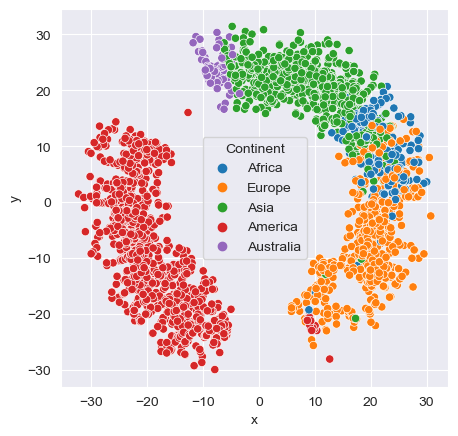

In [5]:
fig, ax1 = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(data=df, x='x', y='y', ax=ax1, hue='Continent')

In [ ]:
fig, ax2 = plt.subplots(figsize=(20, 20), dpi=300)
sns.scatterplot(data=df, x='x', y='y', hue='cyto', size='cyto', size_order=[True, False], ax=ax2)

In [ ]:
fig, ax3 = plt.subplots(figsize=(20, 20), dpi=300)
sns.scatterplot(data=df, x='x', y='y', hue='noeffect', size='noeffect', size_order=[False, True], hue_order=[True, False],ax=ax3)

In [ ]:
fig, ax4 = plt.subplots(figsize=(20, 20), dpi=300)
sns.scatterplot(data=df, x='x', y='y', hue='covidome', size='covidome', size_order=[True, False], hue_order=[False, True],ax=ax4)